In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
experiments_path = Path.cwd() / 'csv' / 'experiments.csv'
exp_df = pd.read_csv(experiments_path)
exp_df.head()


exp_path liquid_type  voltage  \
0  /home/galah92/playground-voltage/Machine Learn...           W      100   
1  /home/galah92/playground-voltage/Machine Learn...           W     1000   
2  /home/galah92/playground-voltage/Machine Learn...           W      150   
3  /home/galah92/playground-voltage/Machine Learn...           W      200   
4  /home/galah92/playground-voltage/Machine Learn...           W      250   

   crop_base                                            profile  
0        230  /home/galah92/playground-voltage/csv/profile_0...  
1        230  /home/galah92/playground-voltage/csv/profile_1...  
2        230  /home/galah92/playground-voltage/csv/profile_2...  
3        230  /home/galah92/playground-voltage/csv/profile_3...  
4        230  /home/galah92/playground-voltage/csv/profile_4...

In [3]:
profiles = [np.load(profile_path) for profile_path in exp_df['profile']]
labels = np.vstack(profiles)
f'{labels.nbytes // 1024**2}MB'


'198MB'

In [4]:
lengths = [np.count_nonzero(profile, axis=1) for profile in profiles]

In [5]:
liquid_types = ['W', 'SW', 'GW']
voltages = sorted(exp_df['voltage'].unique())


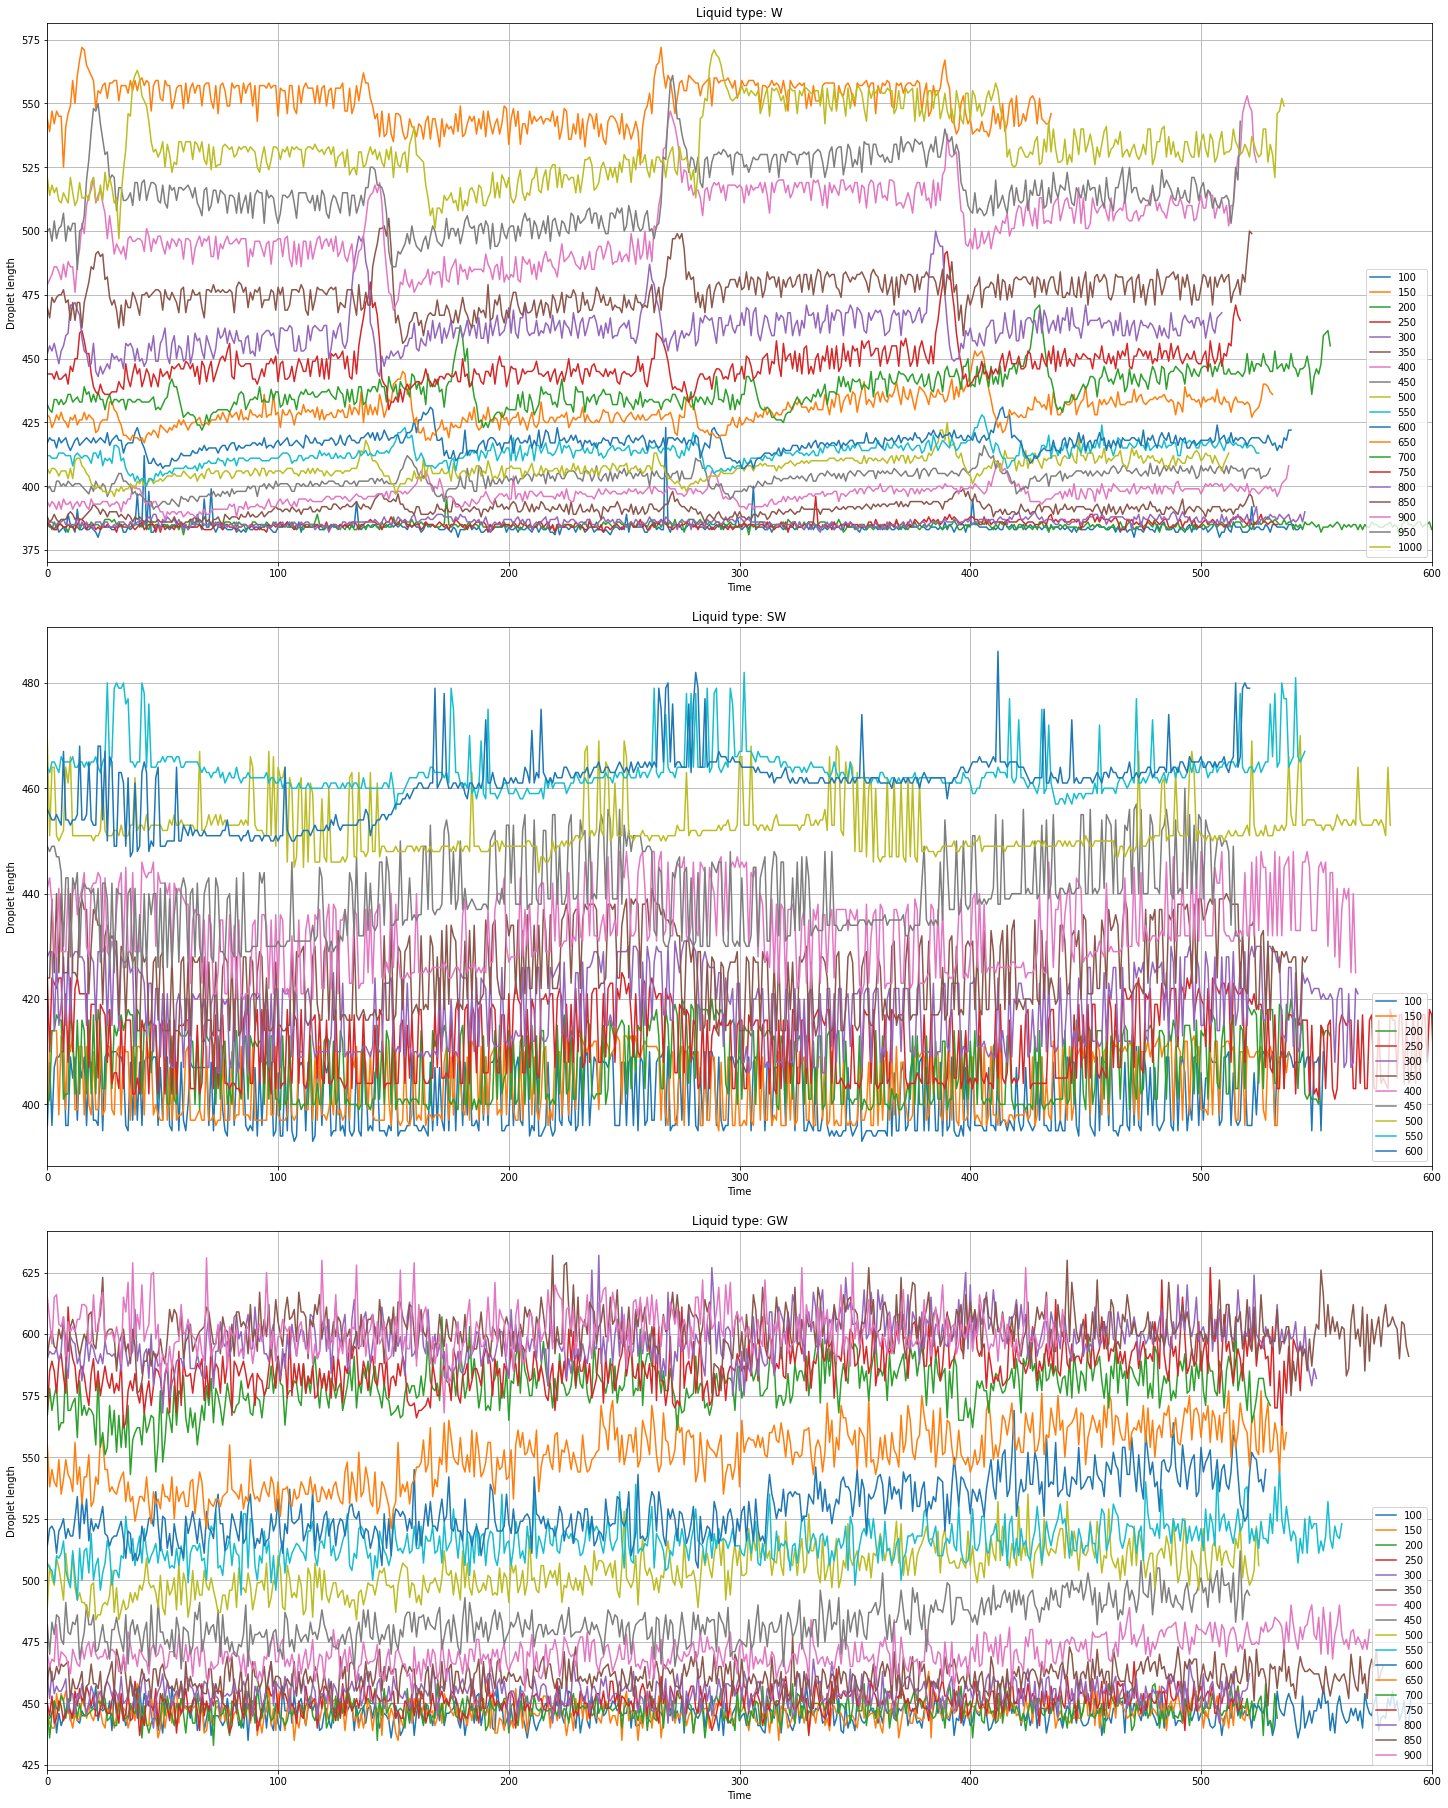

In [6]:
fig, axes = plt.subplots(len(liquid_types), 1,
                         figsize=(20, 25), constrained_layout=True)
for i in range(len(lengths)):
    liquid_type = exp_df.liquid_type[i]
    voltage = exp_df.voltage[i]
    ax = axes[liquid_types.index(liquid_type)]
    ax.plot(lengths[i].T, label=f'{voltage}')
    ax.grid(True)
for ax, liquid_type in zip(axes, liquid_types):
    ax.set_xlim(0, 600)
    title = f"Liquid type: {liquid_type}"
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Droplet length')
    ax.legend(voltages, loc='lower right')

fig_path = Path.cwd() / 'droplet_lengths_per_liquid_type'
fig.savefig(fig_path, facecolor='white', transparent=False, dpi=300)


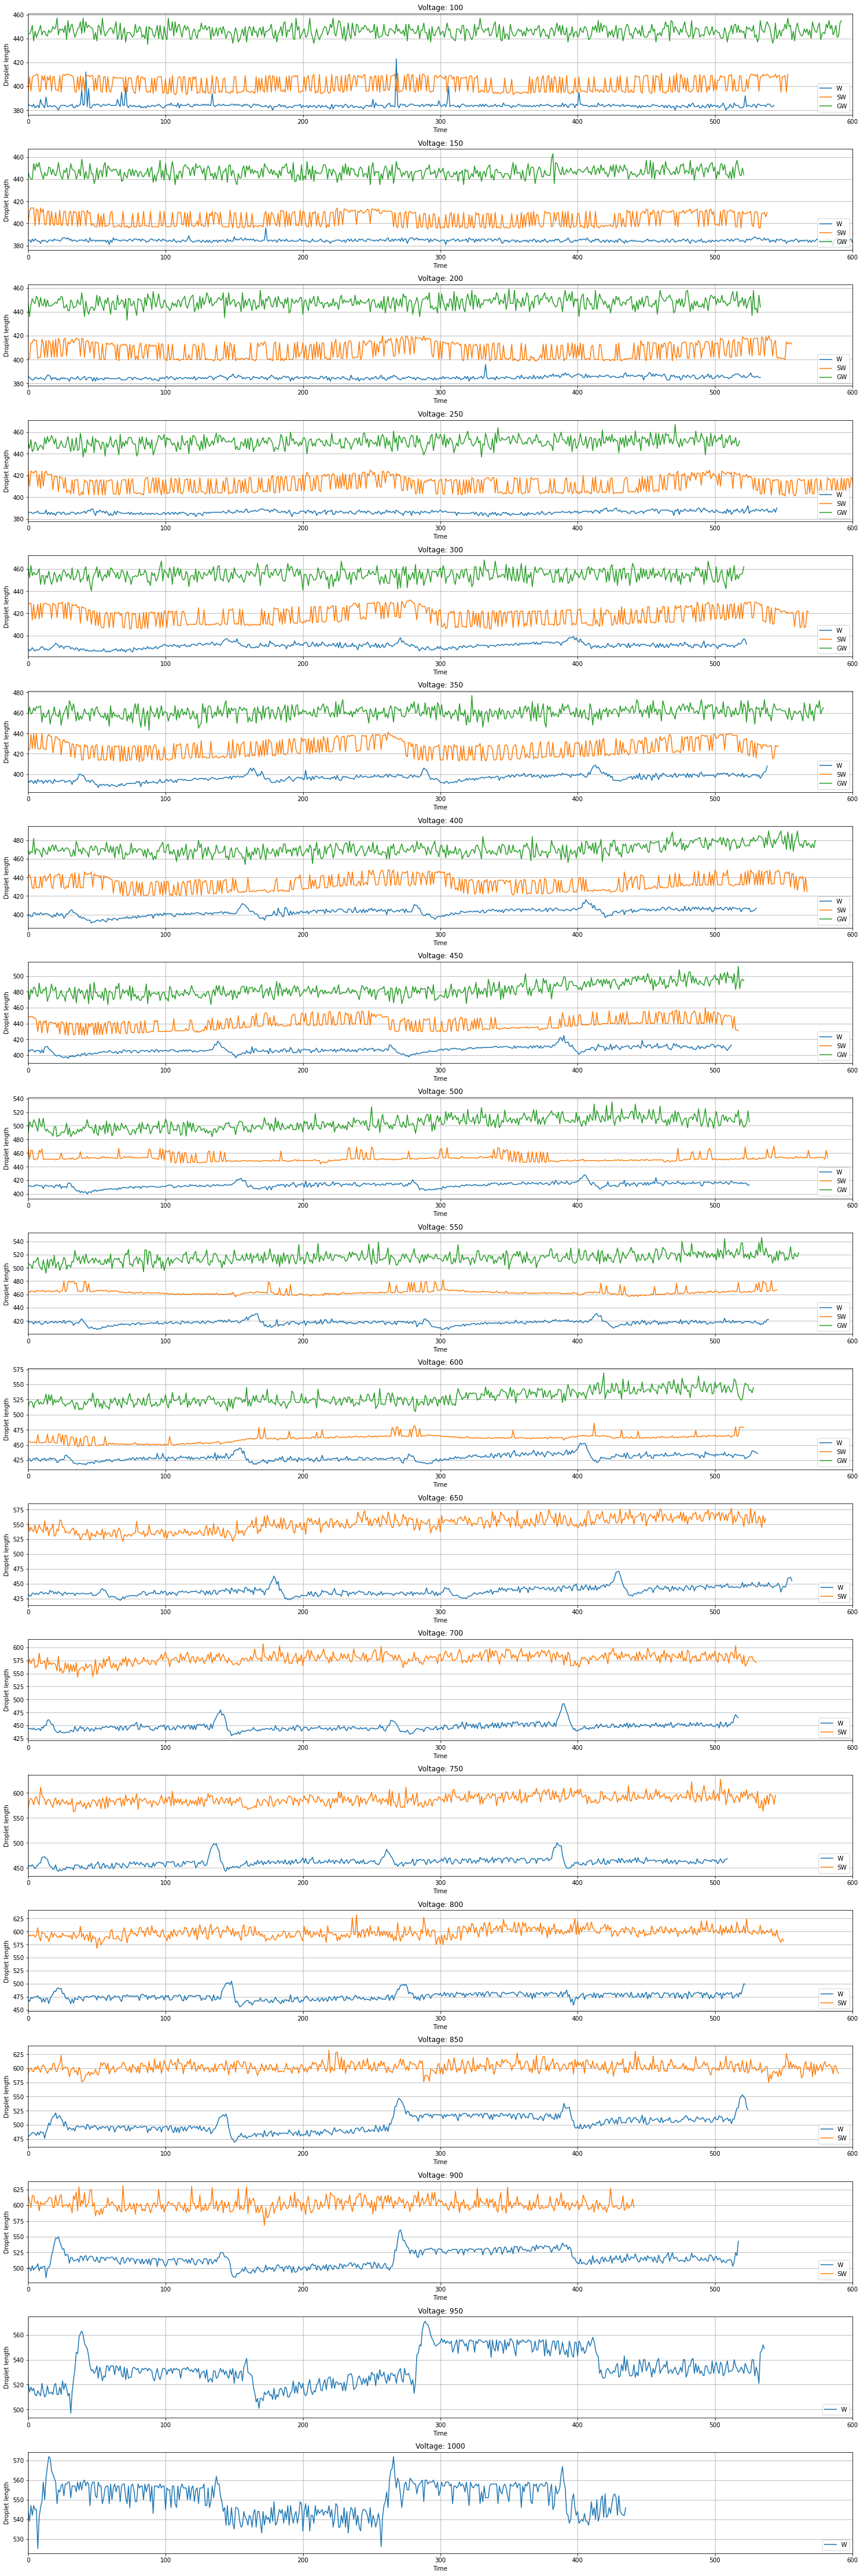

In [7]:
fig, axes = plt.subplots(len(voltages), 1,
                         figsize=(20, 60), constrained_layout=True)
for i in range(len(lengths)):
    liquid_type = exp_df.liquid_type[i]
    voltage = exp_df.voltage[i]
    ax = axes[voltages.index(voltage)]
    ax.plot(lengths[i].T, label=liquid_type)
    ax.grid(True)
for ax, voltage in zip(axes, voltages):
    ax.set_xlim(0, 600)
    title = f"Voltage: {voltage}"
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Droplet length')
    ax.legend(liquid_types, loc='lower right')

fig_path = Path.cwd() / 'droplet_lengths_per_voltage'
fig.savefig(fig_path, facecolor='white', transparent=False, dpi=300)


In [8]:
from matplotlib.animation import FuncAnimation, PillowWriter


def create_animation(exp_profiles, liquid_type, voltage):
    fig, ax = plt.subplots(constrained_layout=True)

    def plot(frame):
        ax.clear()
        line, = ax.plot(exp_profiles[frame])
        title = f'{liquid_type=}, {voltage=}, {frame=:03d}'
        ax.set_title(title)
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Droplet Profile')
        ax.grid(True)
        return line,

    frames = exp_profiles.shape[0]
    an = FuncAnimation(fig, plot, interval=40, blit=True,
                       repeat=True, frames=frames)
    name = f"droplet_profile_{liquid_type}_{voltage}.gif"
    an.save(name, dpi=300, writer=PillowWriter(fps=25))
    print(name)


# create_animation(profiles[0], exp_df.liquid_type[0], exp_df.voltage[0])


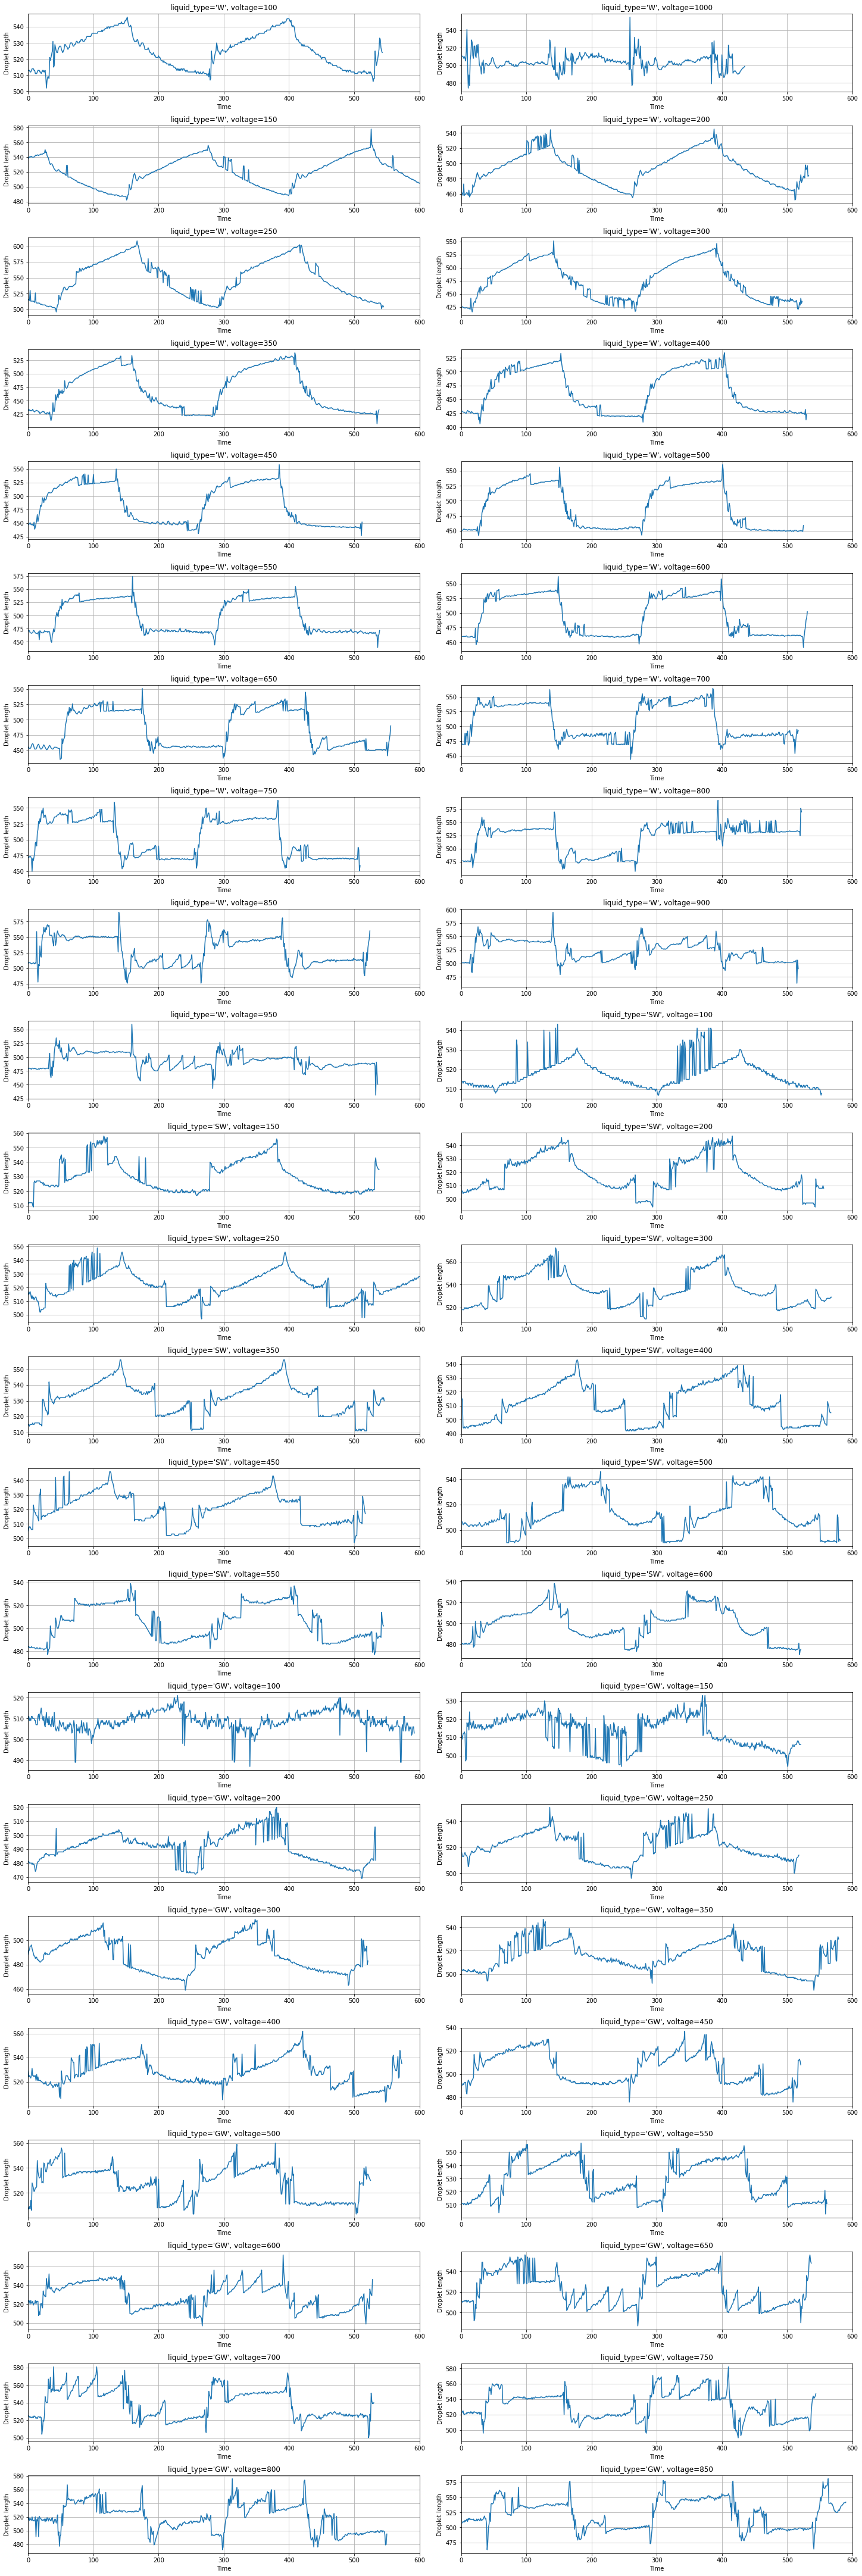

In [20]:
num_experiments = len(exp_df)
fig, axes = plt.subplots(np.ceil(num_experiments // 2).astype(int), 2,
                         figsize=(20, 60), constrained_layout=True)
for i, ax in enumerate(fig.axes[:num_experiments]):
    ax.plot(profiles[i].argmax(axis=1))
    ax.grid(True)
    ax.set_xlim(0, 600)
    liquid_type = exp_df.liquid_type[i]
    voltage = exp_df.voltage[i]
    ax.set_title(f"{liquid_type=}, {voltage=}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Droplet length')

# fig_path = Path.cwd() / 'droplet_lengths_per_voltage'
# fig.savefig(fig_path, facecolor='white', transparent=False, dpi=300)
